In [1]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [2]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
import pandas as pd
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
x=df
y=dataset.target

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: >

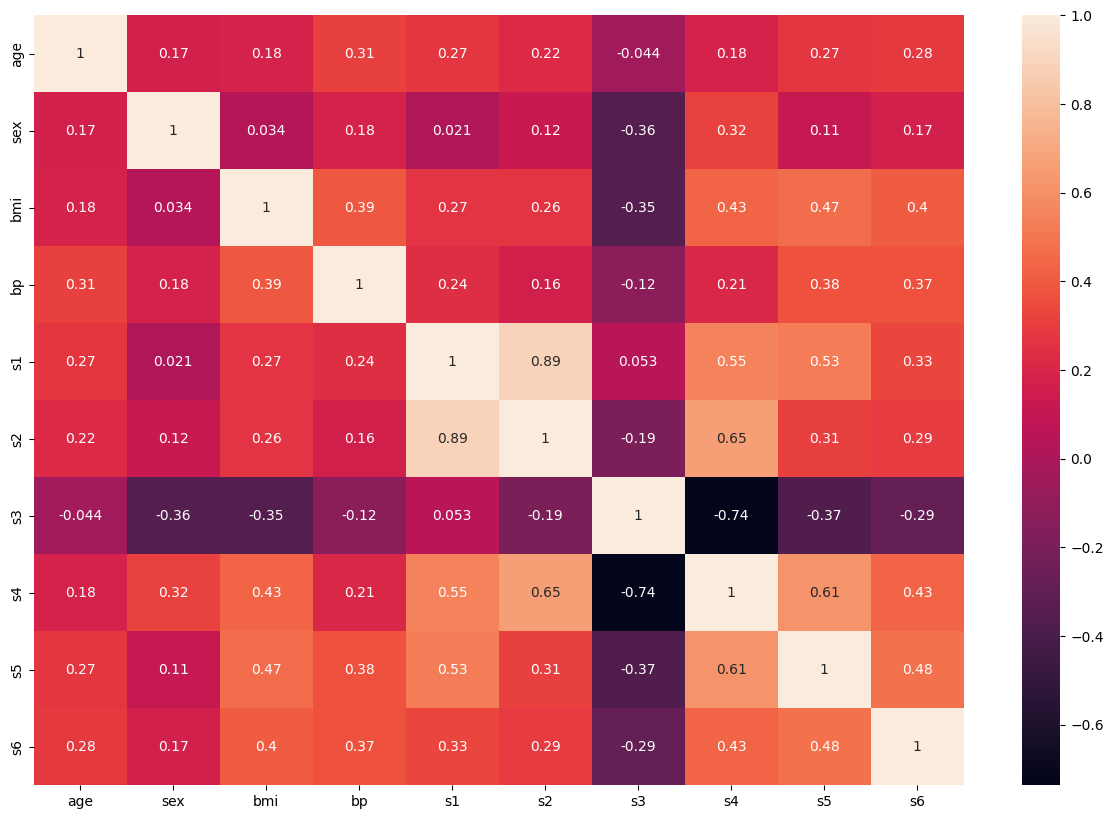

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [11]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'random_state': [0]
}

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dtr,param_grid=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)

In [13]:
import warnings
warnings.filterwarnings('ignore')
grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 57600 candidates, totalling 288000 fits


,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [None, 2, ...], 'max_features': [None, 'sqrt', ...], 'max_leaf_nodes': [None, 10, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'poisson'


In [14]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [15]:
y_pred = grid_search.predict(x_test)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,accuracy_score
print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("R2",r2_score(y_test, y_pred))

MAE 49.420120264583645
MSE 3830.490578636021
R2 0.2770138039725839


[Text(0.5, 0.8333333333333334, 'x[2] <= 0.005\npoisson = 20.018\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.5, 'x[8] <= -0.003\npoisson = 14.627\nsamples = 209\nvalue = 118.043'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'poisson = 10.96\nsamples = 136\nvalue = 97.265'),
 Text(0.375, 0.16666666666666666, 'poisson = 12.084\nsamples = 73\nvalue = 156.753'),
 Text(0.75, 0.5, 'x[2] <= 0.073\npoisson = 13.413\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'poisson = 12.692\nsamples = 118\nvalue = 191.102'),
 Text(0.875, 0.16666666666666666, 'poisson = 4.843\nsamples = 26\nvalue = 271.077')]

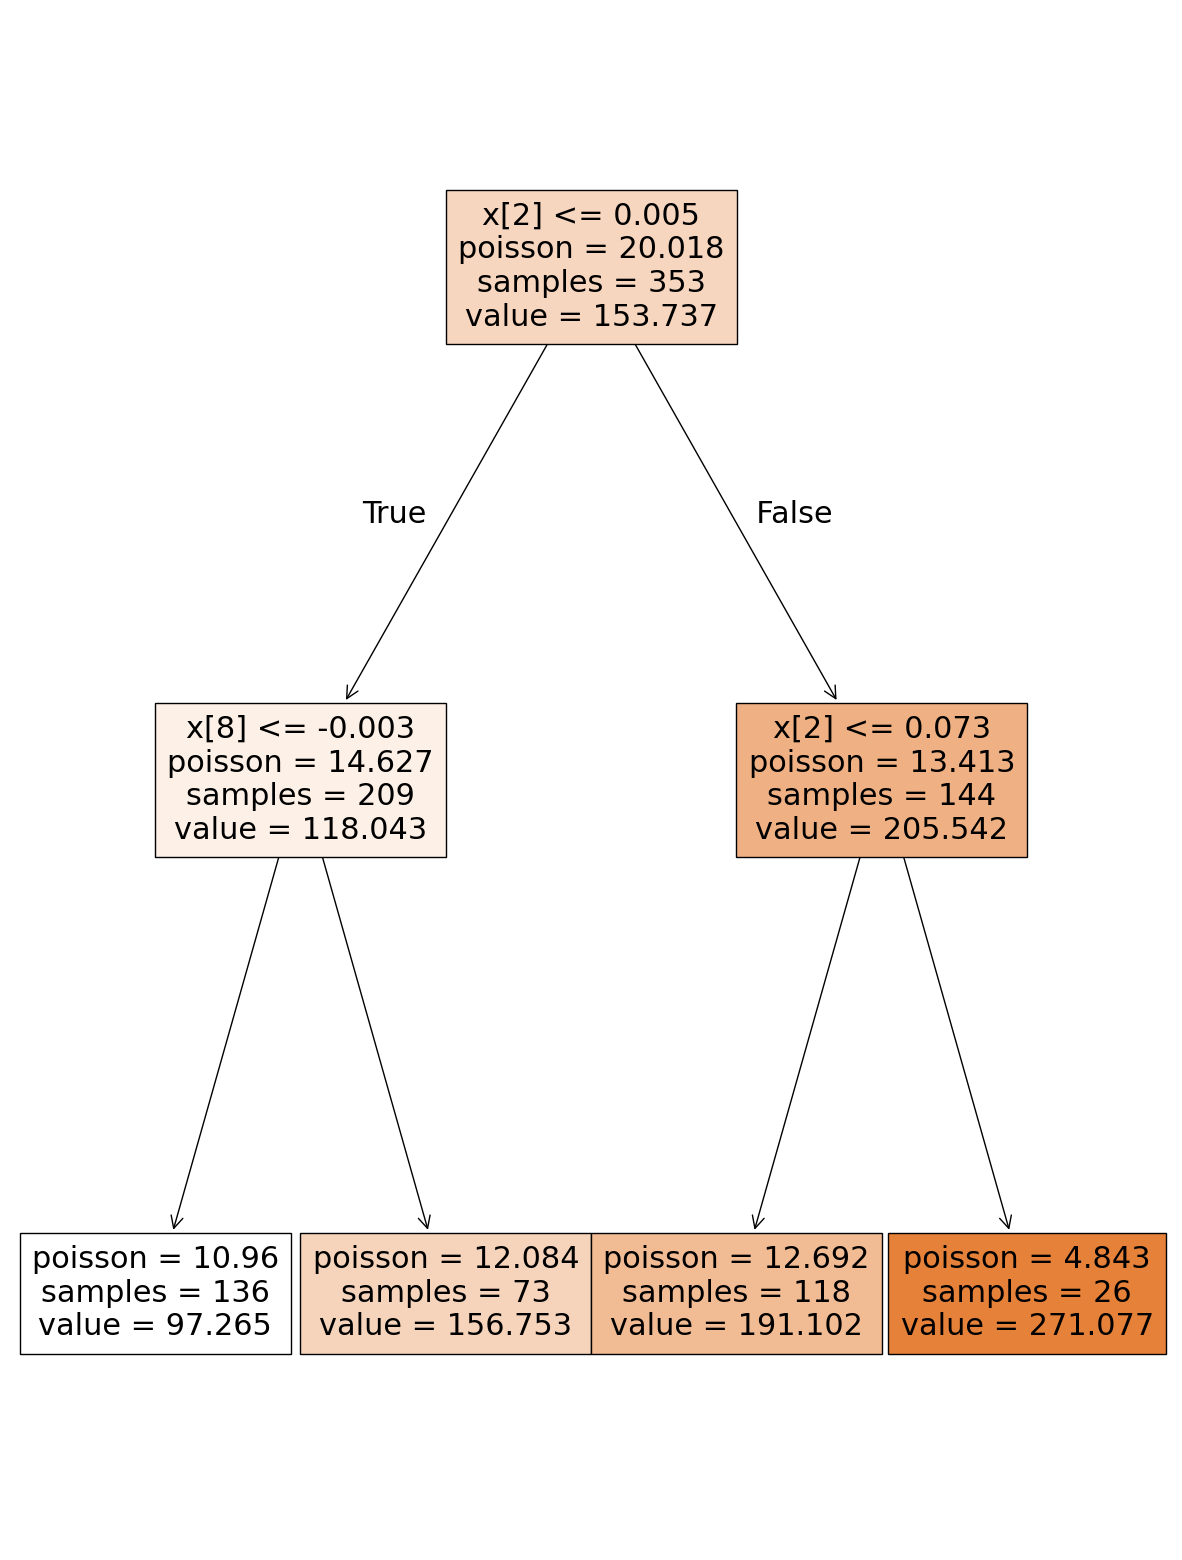

In [17]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(grid_search.best_estimator_, filled=True)